## Additional import for adding package path for iCSF

In [1]:
import sys
sys.path.append("/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages")
print('\n'.join(sys.path))
#add the right path to look for the packages (incl. lmfit)

C:\Users\mbgnwob2\Dropbox (The University of Manchester)\2. Project\Python Script\Single Peak Fitting Script ORIGINAL - Copy
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\python37.zip
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\DLLs
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3

C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\win32
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\win32\lib
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\Pythonwin
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\extensions
C:\Users\mbgnwob2\.ipython
/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages


## Import packages

In [2]:
#import the models and plotting tools

import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from lmfit.models import PseudoVoigtModel  ##error: No module named 'lmfit'
from lmfit.parameter import Parameters
from ipywidgets import FloatProgress
from IPython.display import display
from pathlib import Path
from scipy.signal import medfilt
from matplotlib.pyplot import close
import imageio

import time
import os
import pickle

#import diamond_functions as dia
from diamond_functions import *

#for graphs inline with the text on mac and widows...
%matplotlib inline
#for interactive graphs inline with the text on mac and widows...
#%matplotlib interactive
#best for pop-out graphs on windows...
#%matplotlib tk
#best for pop-out graphs on mac...
# %matplotlib
#for pop-out graphs on mac and windows, but it's a bit dodgey...
#%matplotlib qt

## Adjusting plot parameters

In [3]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('legend',fontsize=20)
plt.rc('axes',linewidth=2)
plt.rc('xtick.major',width=2,size=10)
plt.rc('xtick.minor', width=2, size=5)
plt.rc('ytick.major',width=2,size=10)
plt.rc('ytick.minor',width=2,size=5)

## Define directory & fileprefix for two theta & intensity data:

Load in Engineering stress strain data

Text(0.5, 0, 'Strain, ${\\epsilon}$')

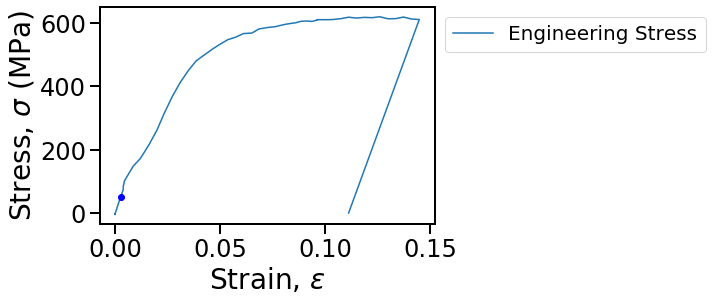

In [4]:
Eng_stress = np.loadtxt('Stress_strain_Tension_Samp2.txt', usecols=0)
Eng_strain = np.loadtxt('Stress_strain_Tension_Samp2.txt', usecols=1)
plt.plot(Eng_strain, Eng_stress, label = 'Engineering Stress')
plt.plot(Eng_strain[10], Eng_stress[10], 'bo')
plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.ylabel('Stress, $\sigma$ (MPa)', fontsize=28)
plt.xlabel('Strain, ${\epsilon}$', fontsize=28)

In [5]:
dirname=Path(str('Test_data_Sample2_tension_strain/'))
dirname=f'{dirname}{os.sep}'
filePrefix = 'Strain_'
fname=filePrefix+'00000.dat'
open_z_file=str(dirname+fname)

dir_FitResults=Path(str('Test_Sample2_FitResults_Cake19/'))
dir_FitResults=f'{dir_FitResults}{os.sep}'

output_dir = 'S2_Out_plots\Cake 19_Plots'
output_dir = f'{output_dir}{os.sep}'


print('dirname = ' +dirname)
print('filePrefix = ' +filePrefix)
#print(fname)
print('combined = ' + open_z_file)

print(output_dir)

dirname = Test_data_Sample2_tension_strain\
filePrefix = Strain_
combined = Test_data_Sample2_tension_strain\Strain_00000.dat
S2_Out_plots\Cake 19_Plots\


In [6]:
cake = 19

## Fit overlapping peaks

Create a Fit2Peak instance (different class for fitting overlapping peaks):

In [7]:
image_1=Fit2Peak(dirname,fname,cake=cake)
image_1.spectrum

array([[  1.29015, 708.404  ],
       [  1.29522, 637.446  ],
       [  1.3003 , 638.731  ],
       ...,
       [ 11.4234 ,   0.     ],
       [ 11.4285 ,   0.     ],
       [ 11.4336 ,   0.     ]])

Use the spectrum in the object and the plot_spectrum function to plot the selected regions of interest in spectrum:

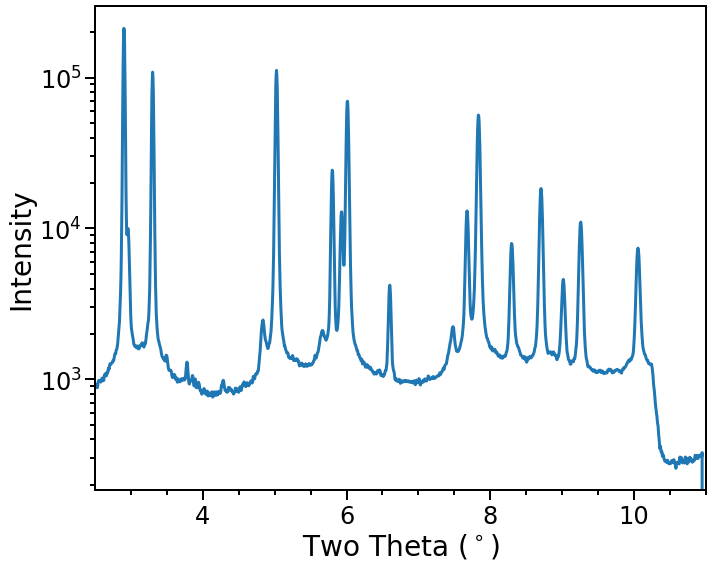

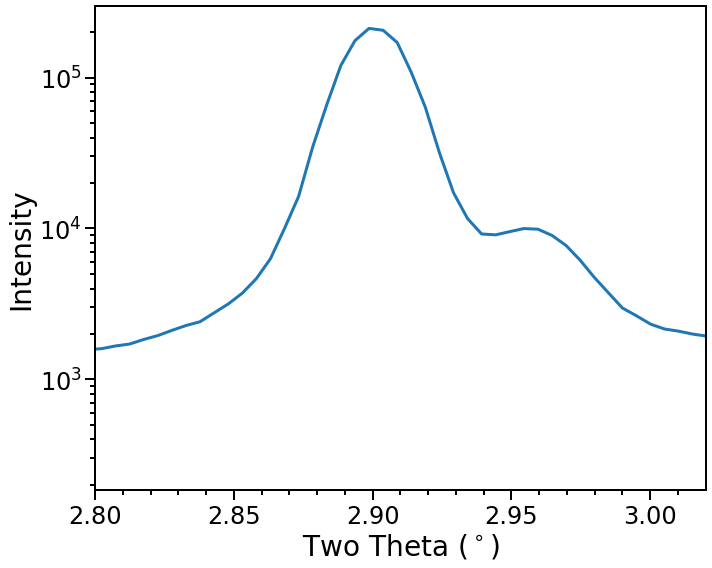

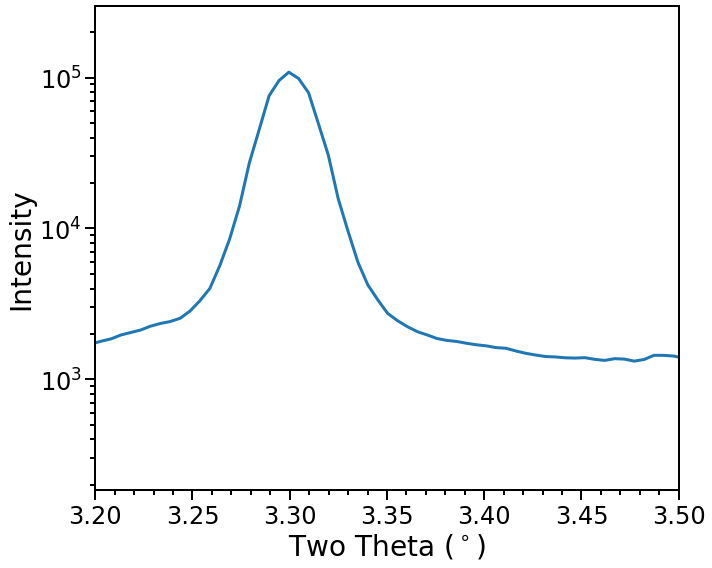

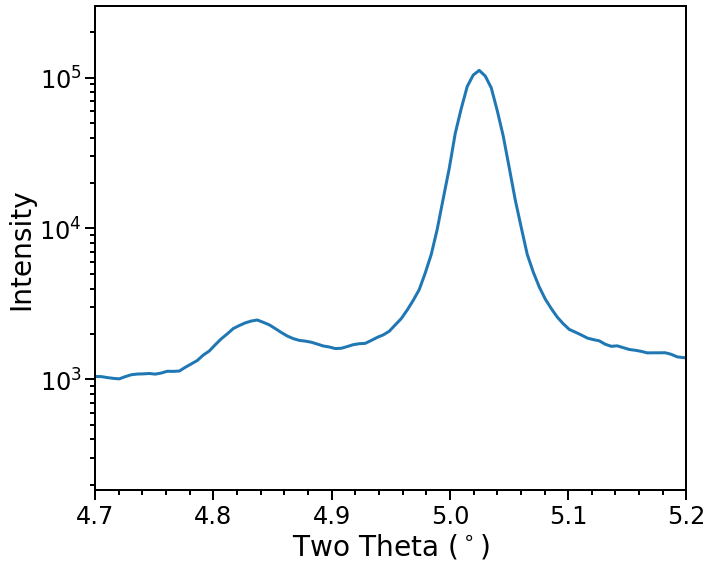

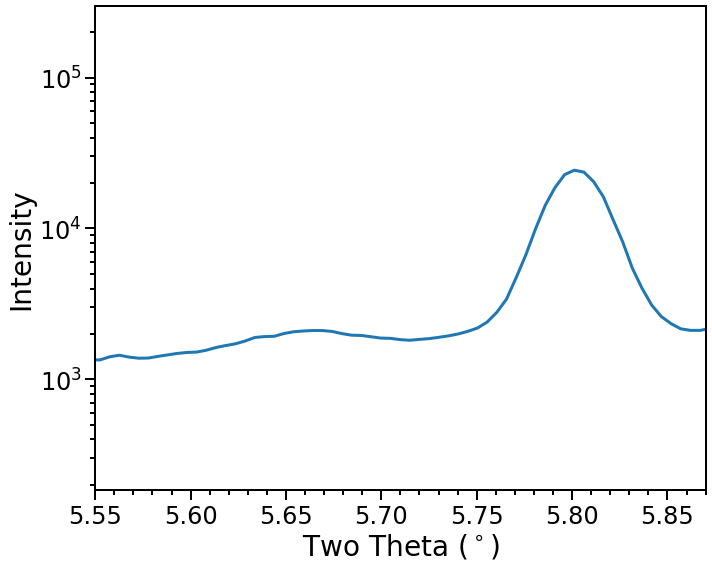

In [8]:
image_1.plot_spectrum(2.5, 11)

image_1.plot_spectrum(2.8, 3.02) # (01-10) & (111)
image_1.plot_spectrum(3.2, 3.5) # (01-11) & (200)
#image_1.plot_spectrum(3.7, 3.83) # (210) 
#image_1.plot_spectrum(4.2,4.4) # (01-12)
image_1.plot_spectrum(4.7, 5.2) # (220) & (11-20)
#image_1.plot_spectrum(5.5, 5.7) # (01-13) & (311)
image_1.plot_spectrum(5.55, 5.87) # (311) & (02-20)

#image_1.plot_spectrum(6.2, 6.8) # (02-22)
#image_1.plot_spectrum(7.2, 8.1) # (02-23) & (21-30) & (21-31)
#image_1.plot_spectrum(8.1, 9.5) # (21-31) & (03-30) & (21-33) & (03-32)

# Fit two overlapping peaks

Define peak bounds (in this case covering the 2 overlapping peaks for the entire thermo-mechanical cycle) and labels of the overlapping peaks as a single string:

In [9]:
sdy_pks = '(311) & (02-20)'
peak_bounds_initial = [(5.45, 5.865)]
peak_labels_initial = [sdy_pks]
#starting centres for the function fit_two_peaks are 

#note, min and max values are not the same as bounds around the peak, but values that they can go up to! 

pv_1_cent=5.66
pv_1_min=5.5
pv_1_max=5.68

pv_2_cent=5.8
pv_2_min=5.75
pv_2_max=5.86

pv_1_cent, pv_1_min, pv_1_max, pv_2_cent, pv_2_min, pv_2_max

(5.66, 5.5, 5.68, 5.8, 5.75, 5.86)

The method `fit_2_peaks` fits two overlapping peaks:

In [10]:
image_1.fit_2_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max)

Results for the fit to both peaks can be looked up:

In [11]:
image_1.fits_dict[sdy_pks].values

{'pv_1amplitude': 89.96624735274736,
 'pv_1center': 5.662177669462596,
 'pv_1sigma': 0.045129574342641136,
 'pv_1fraction': 0.6721008573716661,
 'pv_1fwhm': 0.09025914868528227,
 'pv_1height': 733.5252494167469,
 'pv_2amplitude': 1011.6561465432231,
 'pv_2center': 5.802248536085943,
 'pv_2sigma': 0.017603271557636576,
 'pv_2fraction': 0.4167044800940926,
 'pv_2fwhm': 0.03520654311527315,
 'pv_2height': 23368.703010873316,
 'constBG': 1233.3130477445075}

Now, the peak centre of each peak is additionally labelled pv_1 and pv_2:

In [12]:
print('peak centres...')
print(image_1.fits_dict[sdy_pks].values['pv_1center'])
print(image_1.fits_dict[sdy_pks].values['pv_2center'])

print('peak sigmas...')
print(image_1.fits_dict[sdy_pks].values['pv_1sigma'])
print(image_1.fits_dict[sdy_pks].values['pv_2sigma'])

peak centres...
5.662177669462596
5.802248536085943
peak sigmas...
0.045129574342641136
0.017603271557636576


The peak fit can also be plotted to check:

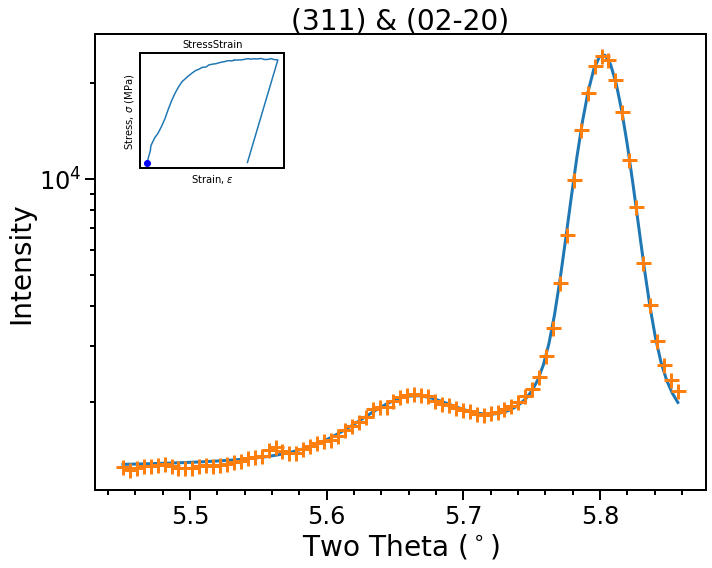

In [13]:
image_number=0
image_1.plot_fit_embedded_ss(sdy_pks, x_val=Eng_strain, y_val=Eng_stress, dot_val=image_number)

### Run through all images with two overlapping peaks

With fitting 2 overlapping peaks, choose a two-theta range which covers the peaks over the entire test. Currrently, peak bounds aren't adjusted within the loop in this case.

The initial parameters need to be passed in this case, so that the pseudo-voigt fit correctly identifies the two peaks each time.

Fitting 2 peaks:

In [14]:
#check number of "strain images" were taken
first_image=0
list = os.listdir(dirname)
last_image = len(list)-1
print(last_image)

58


### Remember to change Cake if needed!

In [15]:
fits=run_thru_images_initParams(filePrefix, dirname, first_image, last_image, peak_bounds_initial, peak_labels_initial, 'normal','two', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                step=1, cake=cake)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
--- 23.071641445159912 seconds ---


## Check the fitting data

{'pv_1amplitude': 46.05137294513229,
 'pv_1center': 5.523141686962551,
 'pv_1sigma': 0.033747619704220966,
 'pv_1fraction': 1.2433359730668059e-08,
 'pv_1fwhm': 0.06749523940844193,
 'pv_1height': 640.9692992534463,
 'pv_2amplitude': 2195.691367184599,
 'pv_2center': 5.763679333952582,
 'pv_2sigma': 0.02480986815163306,
 'pv_2fraction': 0.5807124146597714,
 'pv_2fwhm': 0.04961973630326612,
 'pv_2height': 33789.01970627557,
 'constBG': 1862.8585680197527}

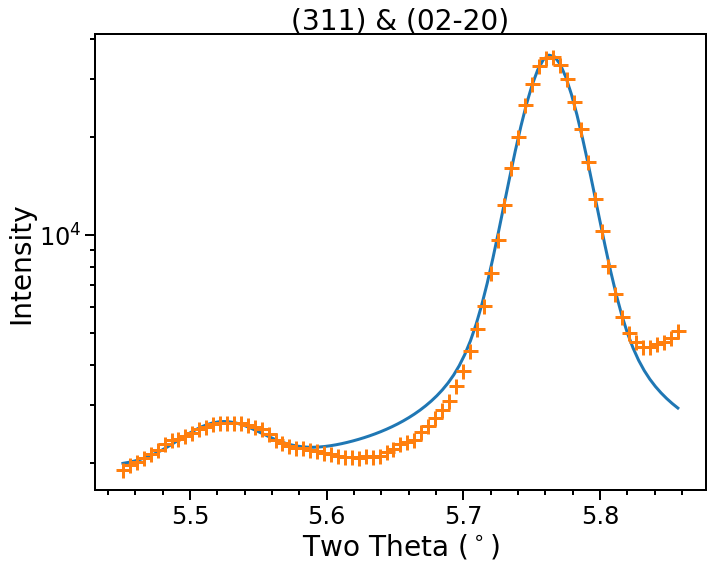

In [16]:
fit_number='00056'
fit_string=filePrefix+fit_number

fit=fits[fit_string]

fit.plot_fit(sdy_pks)

fit.fits_dict[sdy_pks].values

make giff:

In [17]:
firstFile = first_image
lastFile = last_image
step = 1

plotsdir = 'animate_plots/'
images = []

for image_number in range(firstFile,lastFile,step):
    
    fnumber='{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    
    x=image_number
    y=image_number
    
    fit=fits[fname]
    fit.plot_fit_embedded_ss(sdy_pks, x_val=Eng_strain, y_val=Eng_stress, dot_val=image_number)
    
    plot_name=plotsdir+sdy_pks+str(fnumber)+'_spectrum'
    plt.savefig(plot_name, bbox_inches='tight')
    
    images.append(imageio.imread(plot_name+'.png'))
    
    close('all')
    
imageio.mimsave(output_dir + sdy_pks + '_shift.gif', images)

## DELETE GENERATED PNG FILES
for file in os.scandir(plotsdir):
    if file.name.endswith(".png"):
        os.unlink(file.path)

Note, if you weren't able to fit the peaks at the start and you skipped some images, then the graph will not show the correct image number (i.e. image number + skipped files).

## Save the Data

We can use 'pickle' to save our data. However, we can't pickle complex objects containing classes. So, let's rearrange our data into an easier to understand list of nested dictionaries:

In [18]:
firstFile = 0
lastFile = len(fits)
print(lastFile)
step = 1
print(cake, '\n'+ dir_FitResults, '\n'+filePrefix, '\n'+sdy_pks)

59
19 
Test_Sample2_FitResults_Cake19\ 
Strain_ 
(311) & (02-20)


To set up the dictonary and add data:

In [19]:
sorted_list=[]

for image_number in range(firstFile,lastFile,step):
    
    fnumber='{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    
    peak_dict={}
    
    for reflection in fit.reflection_list:
        
        peak_dict[reflection]={}
        peak_dict[reflection]['data_dict']=fits[fname].data_dict[reflection]
        peak_dict[reflection]['lines_dict']=fits[fname].lines_dict[reflection]
        peak_dict[reflection]['params_values']=fits[fname].fits_dict[reflection].values
        
    sorted_list.append(peak_dict)

If we need to insert some more data into our dictionary, beacuse an error made the run crash half way through so we had to restart from the position it crashed.

Then we need to re-access the dictionary in the list, instead of creating an empty dictionary at the start.

Then we pickle our nested dictionaries to save them:

In [20]:
filename = dir_FitResults + filePrefix + sdy_pks + '.pickle'
print(filename)

os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, 'wb') as handle:
    pickle.dump(sorted_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

Test_Sample2_FitResults_Cake19\Strain_(311) & (02-20).pickle


Data is saved as a list of dictionaries...

 - the list order is the file number -1
 
    - first key is the reflection lattice plane, such as (10-10), (11-20), etc.
        - second key is the data type, data_dict, lines_dict, params_values
 
            - data_dict contains an array of the 2-theta and intensity values within the peak bounds
            - lines_dict contains an array of the 100x points of the fit line within the peak bounds
            - params_values contains a dictionary for the psuedo voigt fitting parameters
            - params_values contains fraction,sigma,center,amplitude,fwhm,height,constBG


Show .gif:

In [21]:
from ipywidgets import Image
from IPython import display
animatedGif = output_dir + sdy_pks+'_shift.gif' #path relative to your notebook
file = open(animatedGif , "rb")
image = file.read()
progress= Image(
    value=image,
    format='gif',
    width=500,
    height=500)
display.display(progress)

Image(value=b'GIF89a\xc8\x028\x02\x87\x00\x00\xff\xff\xff\xfe\xfe\xfe\xfd\xfd\xfe\xfd\xfd\xfd\xfc\xfd\xfe\xfc\…

Close gif:

In [22]:
progress.close()